In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [2]:
import os

for f in os.scandir(os.getcwd()+"/All datasets"):
    print(f.name)

111___Wheat.csv
112___Maize_(corn).csv
113___Rice.csv
114___Sorghum.csv
115___Barley.csv
118___Millet.csv
1212___Cabbages.csv
1213___Cauliflowers_and_broccoli.csv
1214___Lettuce_and_chicory.csv
1221___Watermelons.csv
1229___Cantaloupes_and_other_melons.csv
1231___Chillies_and_peppers,_green_(Capsicum_spp._and_Pimenta_spp.).csv
1232___Cucumbers_and_gherkins.csv
1233___Eggplants_(aubergines).csv
1234___Tomatoes.csv
1235___Pumpkins,_squash_and_gourds.csv
1239___Okra.csv
1241___Other_beans,_green.csv
1242___Peas,_green.csv
1251___Carrots_and_turnips.csv
1252___Green_garlic.csv
1253___Onions_and_shallots,_dry_(excluding_dehydrated).csv
1270___Mushrooms_and_truffles.csv
1290___Other_vegetables,_fresh_n.e.c..csv
1312___Bananas.csv
1315___Figs.csv
1316___Mangoes,_guavas_and_mangosteens.csv
1317___Papayas.csv
1318___Pineapples.csv
1319___Other_tropical_fruits,_n.e.c..csv
1321___Pomelos_and_grapefruits.csv
1322___Lemons_and_limes.csv
1323___Oranges.csv
1329___Other_citrus_fruit,_n.e.c..csv
1330_

In [3]:
# Enter the file that you would like to show

filename = "111___Wheat.csv"

In [4]:
filepath = os.getcwd() + "/All Datasets/" + filename

In [5]:
df = pd.read_csv(filepath)

In [6]:
df.head()

,Year,Value,Flag,Flag Description
0,1961,10997000.0,A,Official figure
1,1962,12072000.0,A,Official figure
2,1963,10776000.0,A,Official figure
3,1964,9853000.0,A,Official figure
4,1965,12257000.0,A,Official figure


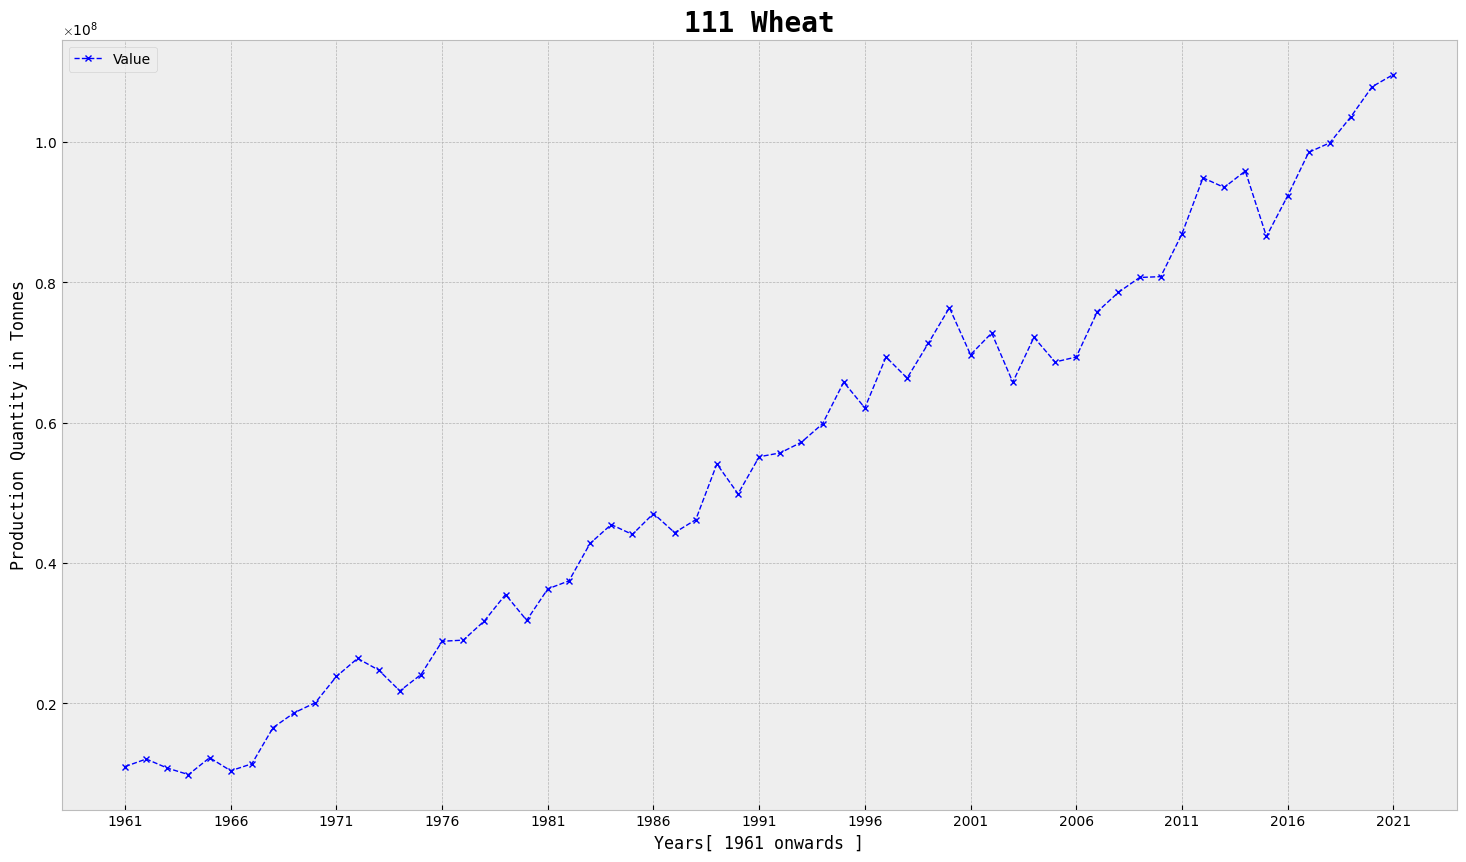

In [7]:
plt.figure(figsize=(18, 10))
plt.plot('Year', 'Value', data=df, color='blue', marker='x', linestyle='--', linewidth=1, markersize=5)
plt.xticks(range(np.min(df['Year']), np.max(df['Year'])+1, 5))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
font1 = {'family':'monospace', 'weight':'semibold', 'size':20}
font2 = {'family':'monospace', 'weight':'ultralight'}
plt.title(filename.replace('___', ' ').replace('_', ' ').strip('.csv'), fontdict=font1)
plt.xlabel("Years[ 1961 onwards ]", fontdict=font2)
plt.ylabel("Production Quantity in Tonnes", fontdict=font2)
plt.legend(loc=2)
print()

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df['Year'].to_numpy().reshape(-1, 1), df['Value'].to_numpy().reshape(-1, 1))

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(df['Year'].to_numpy().reshape(-1, 1))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df['Year'].to_numpy().reshape(-1, 1), pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df['Year'].to_numpy().reshape(-1, 1), pred))

Mean squared error: 3757114844969990.00
Coefficient of determination: -12119725306353.81


In [10]:
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)

Coefficients: 
 [[1635041.5929138]]
Intercept: 
 [-3.20125137e+09]


In [11]:
starting_year = 1961
ending_year = 2030

x = np.arange(starting_year, ending_year)
y = model.intercept_ + model.coef_*x
y = y.reshape(ending_year-starting_year, 1)

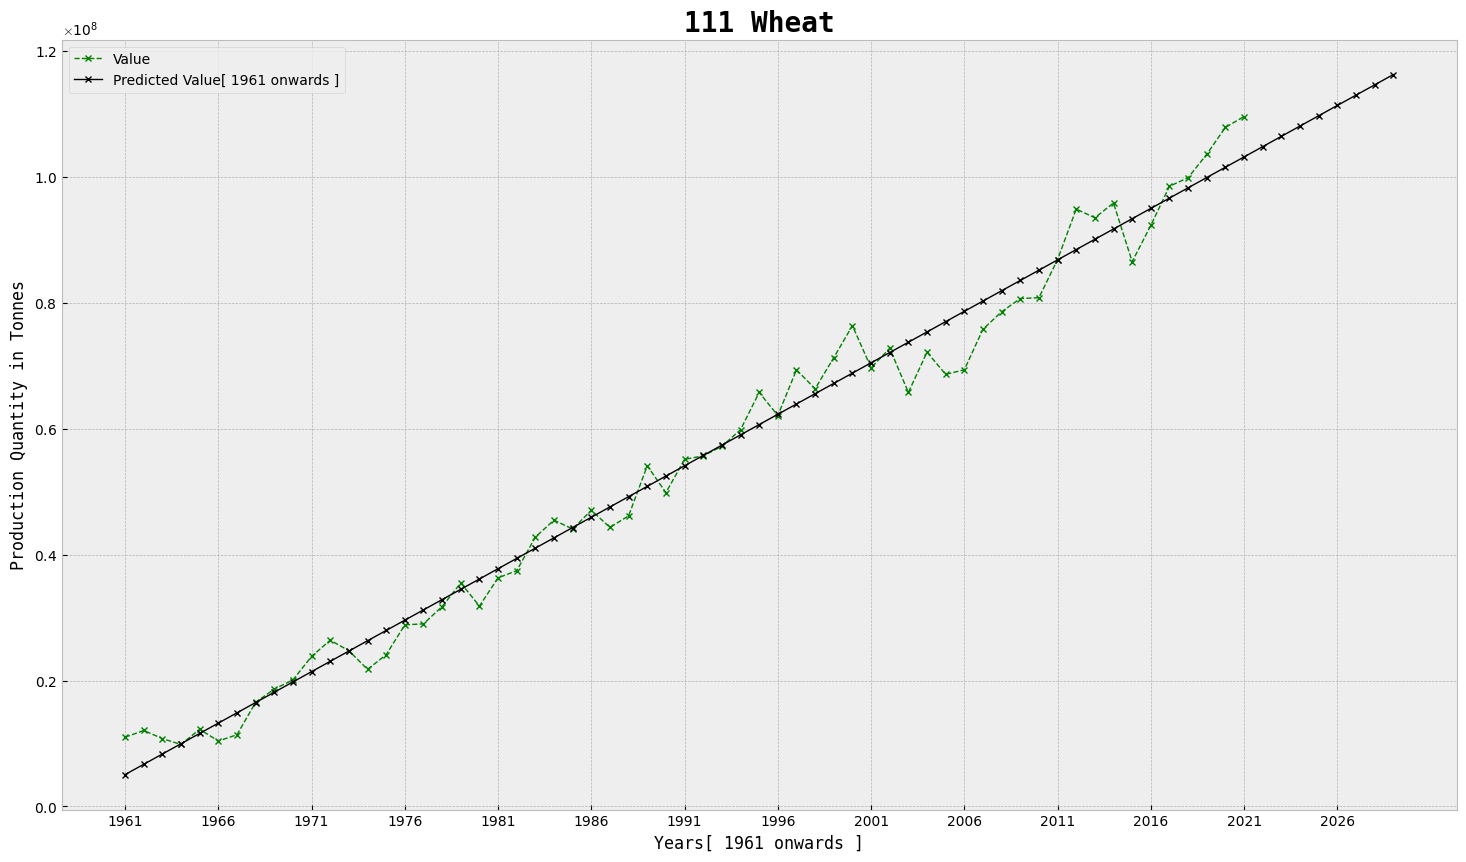

In [17]:
plt.figure(figsize=(18, 10))
plt.plot('Year', 'Value', data=df, color='green', marker='x', linestyle='--', linewidth=1, markersize=5)
plt.plot(x, y, color='black', marker='x', linestyle='-', linewidth=1, markersize=5)
plt.xticks(range(np.min(x), np.max(x)+1, 5))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
font1 = {'family':'monospace', 'weight':'semibold', 'size':20}
font2 = {'family':'monospace', 'weight':'ultralight'}
plt.title(filename.replace('___', ' ').replace('_', ' ').strip('.csv'), fontdict=font1)
plt.xlabel("Years[ 1961 onwards ]", fontdict=font2)
plt.ylabel("Production Quantity in Tonnes", fontdict=font2)
plt.legend(['Value', 'Predicted Value[ 1961 onwards ]'], loc=2, frameon=True)
print()

In [13]:
df_new = df.query(" Year > 2014")
print(df_new.head())

    Year        Value Flag Flag Description
54  2015   86530000.0    A  Official figure
55  2016   92290000.0    A  Official figure
56  2017   98510220.0    A  Official figure
57  2018   99869520.0    A  Official figure
58  2019  103596230.0    A  Official figure


In [14]:
model2 = LinearRegression()

model2.fit(df_new['Year'].to_numpy().reshape(-1, 1), df_new['Value'].to_numpy().reshape(-1, 1))

LinearRegression()

In [15]:
starting_year_2 = 2015
ending_year_2 = 2030

x_2 = np.arange(starting_year_2, ending_year_2)
y_2 = model2.intercept_ + model2.coef_*x_2
y_2 = y_2.reshape(ending_year_2-starting_year_2, 1)

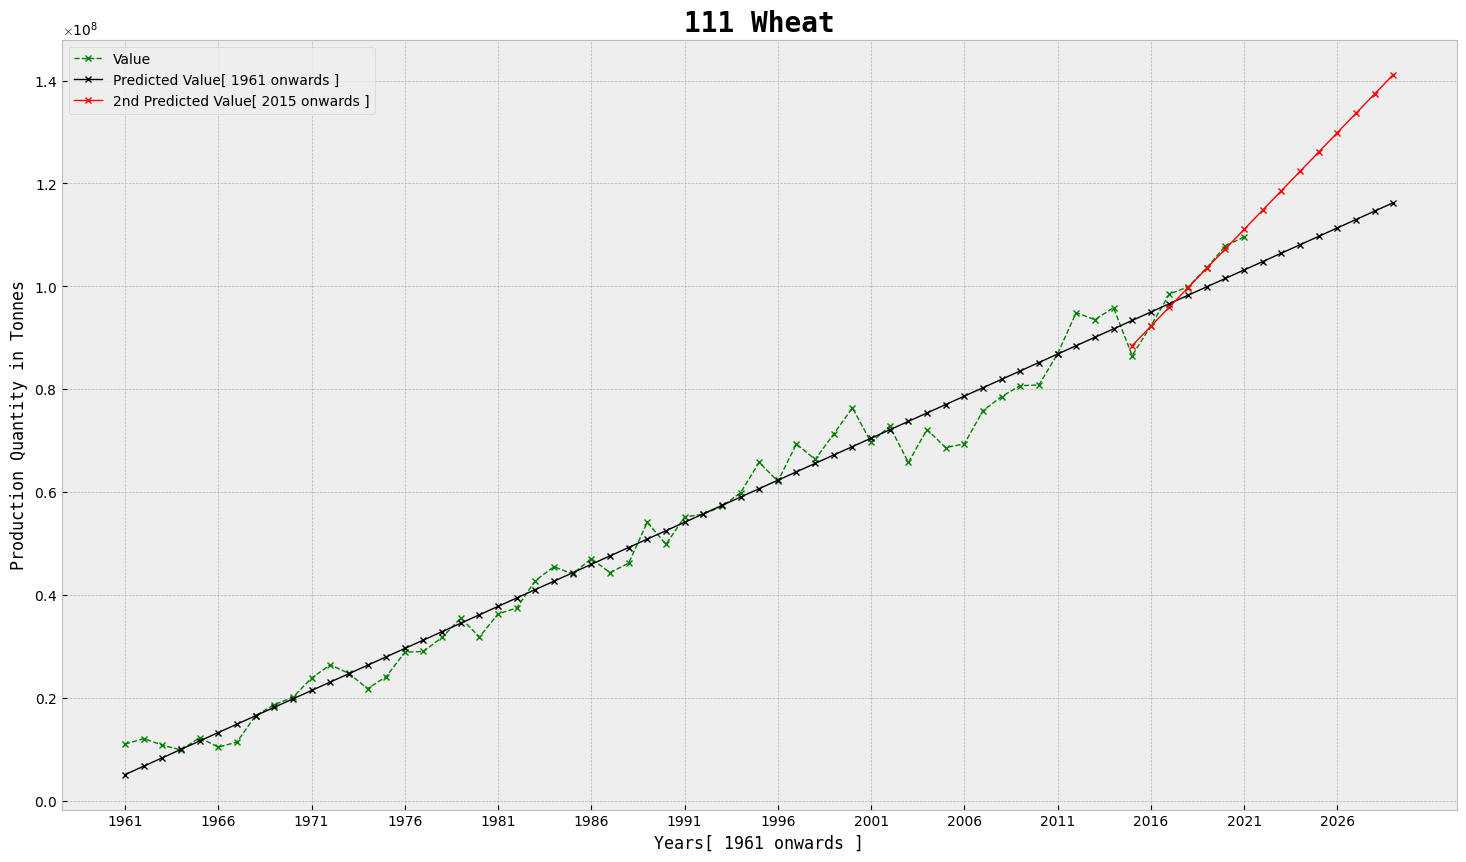

In [16]:
plt.figure(figsize=(18, 10))
plt.plot('Year', 'Value', data=df, color='green', marker='x', linestyle='--', linewidth=1, markersize=5)
plt.plot(x, y, color='black', marker='x', linestyle='-', linewidth=1, markersize=5)
plt.plot(x_2, y_2, color='red', marker='x', linestyle='-', linewidth=1, markersize=5)
plt.xticks(range(np.min(x), np.max(x)+1, 5))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
font1 = {'family':'monospace', 'weight':'semibold', 'size':20}
font2 = {'family':'monospace', 'weight':'ultralight'}
plt.title(filename.replace('___', ' ').replace('_', ' ').strip('.csv'), fontdict=font1)
plt.xlabel("Years[ 1961 onwards ]", fontdict=font2)
plt.ylabel("Production Quantity in Tonnes", fontdict=font2)
plt.legend(['Value', 'Predicted Value[ 1961 onwards ]', '2nd Predicted Value[ 2015 onwards ]'], loc=2, frameon=True)
print()